### Exploratory Data Analysis (EDA)

> Uncovering Insights and Patterns in Statistical Visualizations

- **Datetime:** Helps generate and manipulate date values for time-based analysis
- **Random:** Used to create randomized synthetic data for a more realistic dataset
- **NumPy:** Provides numerical operations and efficient array handling
- **Seaborn:** Enhances visualizations with statistical plotting capabilities
- **Pandas:** Used for data manipulation and analysis, especially with DataFrames
- **Matplotlib:** Essential for data visualization and plotting

In [1]:
# 1. Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
from datetime import datetime, timedelta
import random

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# 1. Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# 2. Define dataset parameters
num_rows = 1000
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 12, 31)
currencies = ["USD", "EUR", "BRL", "JPY"]
transaction_types = ["Invoice Payment", "Refund", "Salary", "Purchase"]
departments = ["Finance", "HR", "IT", "Marketing"]

# 2. Loading the dataset into a DataFrame
# df = pd.read_csv("../../data/dataset.csv")

# 3. Generate synthetic data
transaction_ids = np.arange(1, num_rows + 1)
transaction_dates = [start_date + timedelta(days=random.randint(0, (end_date - start_date).days)) for _ in range(num_rows)]
payer_accounts = [f"ACC-{random.randint(1000, 9999)}" for _ in range(num_rows)]
receiver_accounts = [f"ACC-{random.randint(1000, 9999)}" for _ in range(num_rows)]
transaction_amounts = np.round(np.random.uniform(100, 10000, num_rows), 2)
document_refs = [f"DOC-{random.randint(10000, 99999)}" for _ in range(num_rows)]
transaction_types = np.random.choice(transaction_types, num_rows)
departments = np.random.choice(departments, num_rows)
tax_values = np.round(transaction_amounts * np.random.uniform(0.05, 0.25, num_rows), 2)
currency_types = np.random.choice(currencies, num_rows)
exchange_rates = np.round(np.random.uniform(0.8, 1.5, num_rows), 4)

# 4. Create DataFrame
df = pd.DataFrame({
    "transaction_id": transaction_ids,
    "transaction_date": transaction_dates,
    "payer_account": payer_accounts,
    "receiver_account": receiver_accounts,
    "transaction_amount": transaction_amounts,
    "document_ref": document_refs,
    "transaction_type": transaction_types,
    "department": departments,
    "tax_value": tax_values,
    "currency_type": currency_types,
    "exchange_rate": exchange_rates
})

In [3]:
# 4a. Checking the dataset shape (rows, columns)
df.shape

(1000, 11)

In [4]:
# 5. Displaying a sample of the dataset (first five rows)
df.head()

,transaction_id,transaction_date,payer_account,receiver_account,transaction_amount,document_ref,transaction_type,department,tax_value,currency_type,exchange_rate
0,1,2023-10-17,ACC-9922,ACC-5873,3807.95,DOC-92074,Salary,Marketing,389.71,BRL,1.0006
1,2,2022-04-25,ACC-4683,ACC-8430,9512.07,DOC-70238,Purchase,HR,945.46,USD,1.3618
2,3,2022-01-26,ACC-3441,ACC-2195,7346.74,DOC-12134,Refund,HR,1698.94,USD,1.4981
3,4,2022-10-09,ACC-5352,ACC-1981,6026.72,DOC-26284,Purchase,Marketing,602.13,JPY,0.8210
4,5,2022-09-08,ACC-3330,ACC-3589,1644.58,DOC-30707,Purchase,Finance,171.68,BRL,1.4282


In [5]:
# 6. Displaying column names
df.columns

Index(['transaction_id', 'transaction_date', 'payer_account',
       'receiver_account', 'transaction_amount', 'document_ref',
       'transaction_type', 'department', 'tax_value', 'currency_type',
       'exchange_rate'],
      dtype='object')

In [6]:
# 7. Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      1000 non-null   int64         
 1   transaction_date    1000 non-null   datetime64[ns]
 2   payer_account       1000 non-null   object        
 3   receiver_account    1000 non-null   object        
 4   transaction_amount  1000 non-null   float64       
 5   document_ref        1000 non-null   object        
 6   transaction_type    1000 non-null   object        
 7   department          1000 non-null   object        
 8   tax_value           1000 non-null   float64       
 9   currency_type       1000 non-null   object        
 10  exchange_rate       1000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 86.1+ KB


In [7]:
# 8. Are there missing values?
df.isna().any()

transaction_id        False
transaction_date      False
payer_account         False
receiver_account      False
transaction_amount    False
document_ref          False
transaction_type      False
department            False
tax_value             False
currency_type         False
exchange_rate         False
dtype: bool

In [8]:
# 9. Are there missing values? How many?
df.isna().sum()

transaction_id        0
transaction_date      0
payer_account         0
receiver_account      0
transaction_amount    0
document_ref          0
transaction_type      0
department            0
tax_value             0
currency_type         0
exchange_rate         0
dtype: int64

In [9]:
# 10. Sum of missing values per column
missing_values = df.isna().sum()

# 11. Total number of rows
total_rows = len(df)

# 12. Proportion of missing values per column
missing_value_proportion = missing_values / total_rows

# Displaying the proportion of missing values
print(missing_value_proportion)

transaction_id        0.0
transaction_date      0.0
payer_account         0.0
receiver_account      0.0
transaction_amount    0.0
document_ref          0.0
transaction_type      0.0
department            0.0
tax_value             0.0
currency_type         0.0
exchange_rate         0.0
dtype: float64


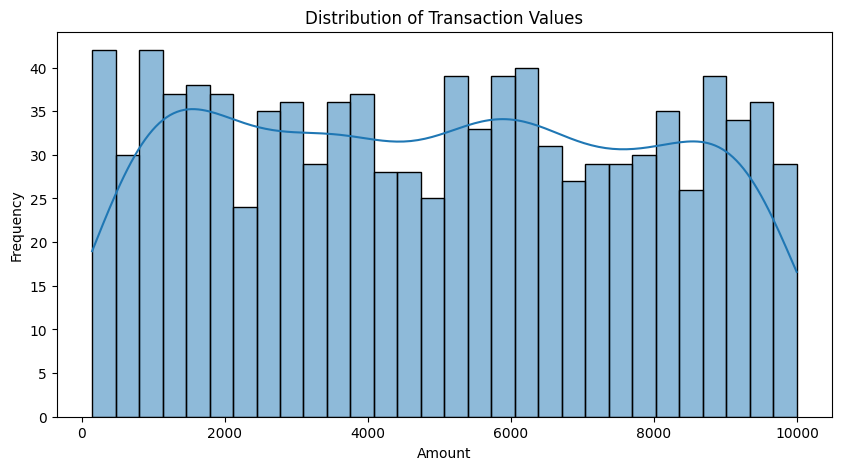

In [10]:
# 13. Plot 1: Distribution of Transaction Values
plt.figure(figsize=(10, 5))
sns.histplot(df['transaction_amount'], kde=True, bins=30)
plt.title('Distribution of Transaction Values')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

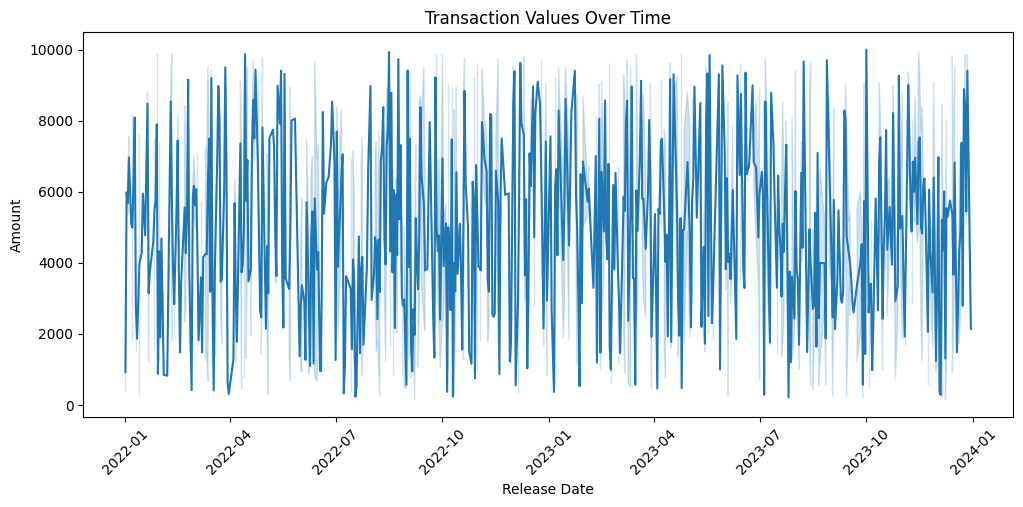

In [11]:
# 14. Plot 2: Transaction Values Over Time
plt.figure(figsize=(12, 5))
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
sns.lineplot(x='transaction_date', y='transaction_amount', data=df)
plt.title('Transaction Values Over Time')
plt.xlabel('Release Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

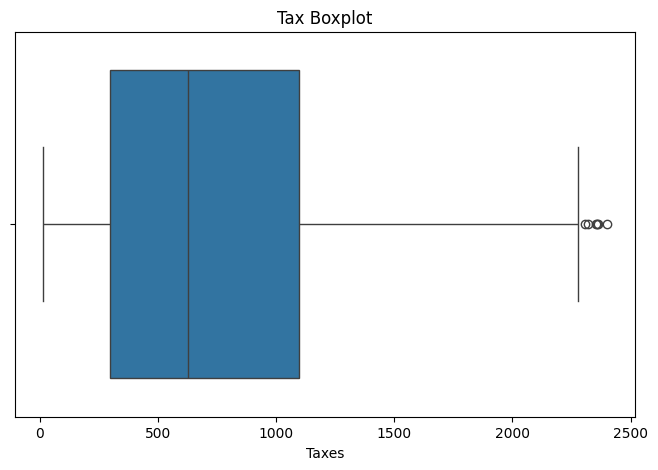

In [12]:
# 15. Plot 3: Tax Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['tax_value'])
plt.title('Tax Boxplot')
plt.xlabel('Taxes')
plt.show()

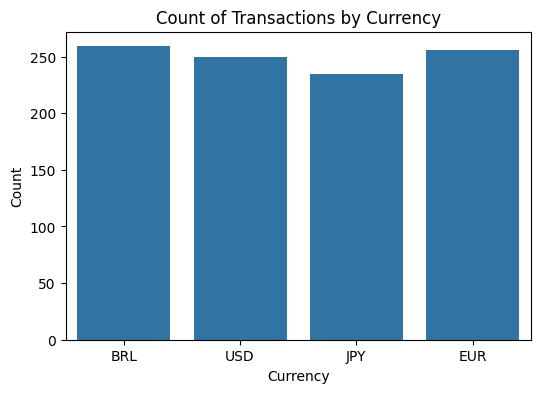

In [13]:
# 16. Plot 4: Count of Transactions by Currency
plt.figure(figsize=(6, 4))
sns.countplot(x='currency_type', data=df)
plt.title('Count of Transactions by Currency')
plt.xlabel('Currency')
plt.ylabel('Count')
plt.show()

In [14]:
# 17. Are there missing values?
df['tax_value'].isna().sum()

np.int64(0)

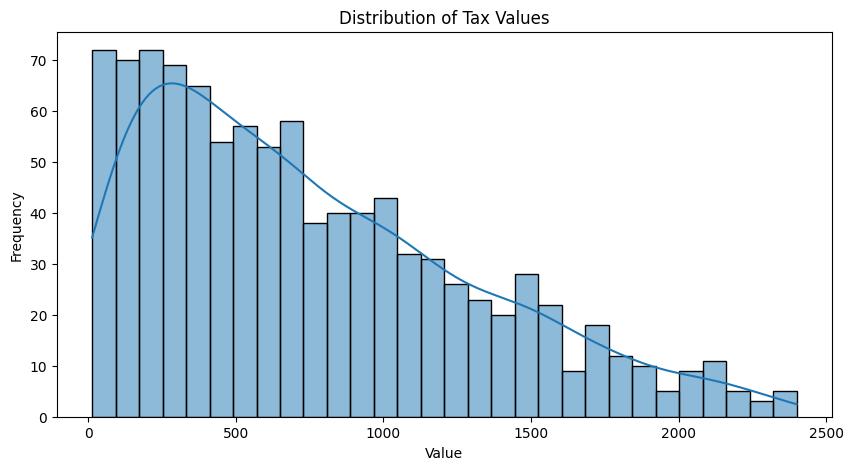

In [15]:
# 18. Distribution of Tax Values
plt.figure(figsize=(10, 5))
sns.histplot(df['tax_value'], kde=True, bins=30)
plt.title('Distribution of Tax Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [16]:
# 19. Mean
df['tax_value'].mean()

np.float64(747.85286)

In [17]:
# 20. Median
df['tax_value'].median()

np.float64(625.48)

In [18]:
# 21. Replacing missing values in 'taxes' with the median
# df['tax_value'].fillna(df['tax_value'].median(), inplace=True)
df.fillna({'tax_value': df['tax_value'].median()}, inplace=True)

In [19]:
# 23. Are there missing values? How many?
df.isna().sum()

transaction_id        0
transaction_date      0
payer_account         0
receiver_account      0
transaction_amount    0
document_ref          0
transaction_type      0
department            0
tax_value             0
currency_type         0
exchange_rate         0
dtype: int64

In [20]:
# 24. Are there missing values in 'currency'?
df['currency_type'].isna().sum()

np.int64(0)

In [21]:
# 25. Calculate the mode
df['currency_type'].mode()[0]

'BRL'

In [22]:
# 26. Replacing missing values in 'currency' with the mode
# df['currency_type'].fillna(df['currency_type'].mode()[0], inplace=True)
df.fillna({'currency_type': df['currency_type'].mode()[0]}, inplace=True)

In [23]:
# 27. Are there missing values in 'currency'?
df['currency_type'].isna().sum()

np.int64(0)

In [24]:
# 28. Calculating the sum of missing values per column
missing_values = df.isna().sum()

# 29. Calculating the total number of rows
total_rows = len(df)

# 30. Calculating the proportion of missing values per column
missing_value_proportion = missing_values / total_rows

# Displaying the proportion of missing values
print(missing_value_proportion)

transaction_id        0.0
transaction_date      0.0
payer_account         0.0
receiver_account      0.0
transaction_amount    0.0
document_ref          0.0
transaction_type      0.0
department            0.0
tax_value             0.0
currency_type         0.0
exchange_rate         0.0
dtype: float64


In [25]:
# 31. Filling missing values in 'conversion_rate' with the category 'Other'
# df['exchange_rate'].fillna('Other', inplace=True)
df.fillna({'exchange_rate': 'Other'}, inplace=True)

In [26]:
# 32. Filling missing values in 'document' with the category 'Other'
# df['document_ref'].fillna('Other', inplace=True)
df.fillna({'document_ref': 'Other'}, inplace=True)

In [27]:
# 33. Filling missing values in 'operation_nature' with bfill
# This method fills each missing value with the next valid value in the same column (backward fill)
df['operation_nature'] = df['transaction_type']
df['operation_nature'].fillna(method='bfill', inplace=True)

C:\Users\ShortThirdMan\AppData\Local\Temp\ipykernel_25508\379555187.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['operation_nature'].fillna(method='bfill', inplace=True)
C:\Users\ShortThirdMan\AppData\Local\Temp\ipykernel_25508\379555187.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['operation_nature'].fillna(method='bfill', inplace=True)


In [28]:
df.head()

,transaction_id,transaction_date,payer_account,receiver_account,transaction_amount,document_ref,transaction_type,department,tax_value,currency_type,exchange_rate,operation_nature
0,1,2023-10-17,ACC-9922,ACC-5873,3807.95,DOC-92074,Salary,Marketing,389.71,BRL,1.0006,Salary
1,2,2022-04-25,ACC-4683,ACC-8430,9512.07,DOC-70238,Purchase,HR,945.46,USD,1.3618,Purchase
2,3,2022-01-26,ACC-3441,ACC-2195,7346.74,DOC-12134,Refund,HR,1698.94,USD,1.4981,Refund
3,4,2022-10-09,ACC-5352,ACC-1981,6026.72,DOC-26284,Purchase,Marketing,602.13,JPY,0.8210,Purchase
4,5,2022-09-08,ACC-3330,ACC-3589,1644.58,DOC-30707,Purchase,Finance,171.68,BRL,1.4282,Purchase


In [29]:
# 34. Checking for the '?' character in the 'credit_account' column (Method 1)
df['credit_account'] = df['receiver_account']
has_question_mark = df['credit_account'].isin(['?']).any()
print(has_question_mark)

False


In [30]:
df['credit_account'].isin(['?'])

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: credit_account, Length: 1000, dtype: bool

In [31]:
# 34. Checking for the '?' character in the 'credit_account' column (Method 1)
has_question_mark = df['credit_account'].isin(['?']).any()
print(has_question_mark)

False


In [32]:
# 35. Counting the frequency of each value in the 'credit_account' column (Method 2)
value_counts = df['credit_account'].value_counts()

# 35a. Checking if '?' is in the counts and getting its number of occurrences
question_mark_count = value_counts.get('?', 0)

# Print the number of occurrences of '?'
print(question_mark_count)

0


In [33]:
# 36. Identifying categorical columns (Method 3)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Check for the presence of '?' in each categorical column
for column in categorical_columns:
    has_question_mark = df[column].isin(['?']).any()
    print(f"Does the column '{column}' contain '?'? {has_question_mark}")

Does the column 'payer_account' contain '?'? False
Does the column 'receiver_account' contain '?'? False
Does the column 'document_ref' contain '?'? False
Does the column 'transaction_type' contain '?'? False
Does the column 'department' contain '?'? False
Does the column 'currency_type' contain '?'? False
Does the column 'operation_nature' contain '?'? False
Does the column 'credit_account' contain '?'? False


In [34]:
# 37. Replacing '?' with NaN and then filling missing values
df['credit_account'].replace('?', np.nan, inplace=True)

# 37a. This method fills each missing value with the previous valid value in the same column (forward fill)
df['credit_account'].fillna(method='ffill', inplace=True)

C:\Users\ShortThirdMan\AppData\Local\Temp\ipykernel_25508\1794360796.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['credit_account'].replace('?', np.nan, inplace=True)
C:\Users\ShortThirdMan\AppData\Local\Temp\ipykernel_25508\1794360796.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [35]:
# 38. Are there missing values in 'credit_account'?
df['credit_account'].isna().sum()

np.int64(0)

In [36]:
# 39. Are there missing values?
df.isna().sum()

transaction_id        0
transaction_date      0
payer_account         0
receiver_account      0
transaction_amount    0
document_ref          0
transaction_type      0
department            0
tax_value             0
currency_type         0
exchange_rate         0
operation_nature      0
credit_account        0
dtype: int64

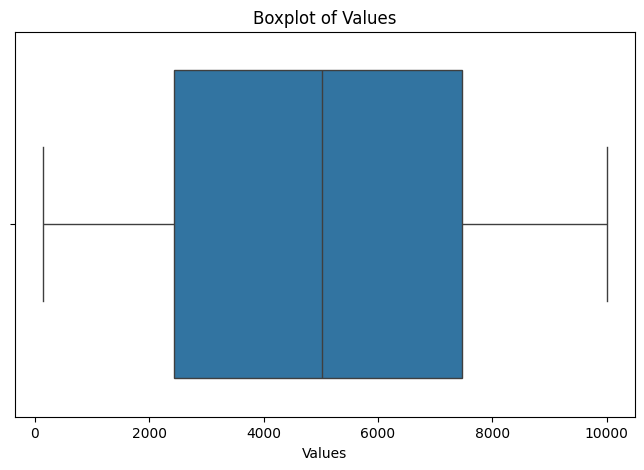

In [37]:
# 40. Boxplot of Transaction Values
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['transaction_amount'])
plt.title('Boxplot of Values')
plt.xlabel('Values')
plt.show()

In [38]:
# 41. Outlier treatment for the 'amount' variable

# Calculating Q1 and Q3
Q1 = df['transaction_amount'].quantile(0.25)
Q3 = df['transaction_amount'].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Setting limits to identify outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtering out the outliers
df_filtered_1 = df[~((df['transaction_amount'] < lower_limit) | (df['transaction_amount'] > upper_limit))]

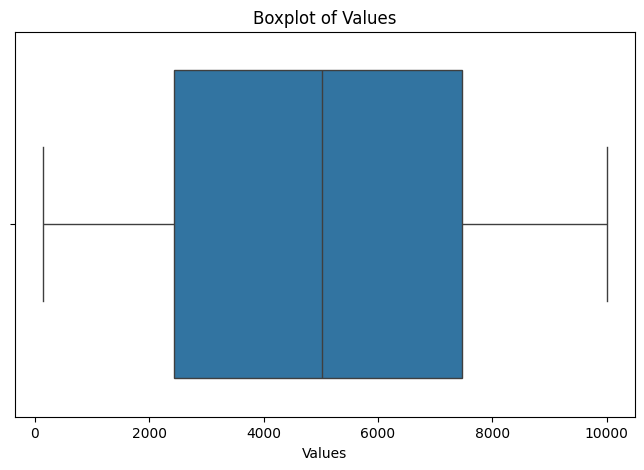

In [39]:
# 42. Boxplot of Transaction Values (after filtering outliers)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_filtered_1['transaction_amount'])
plt.title('Boxplot of Values')
plt.xlabel('Values')
plt.show()

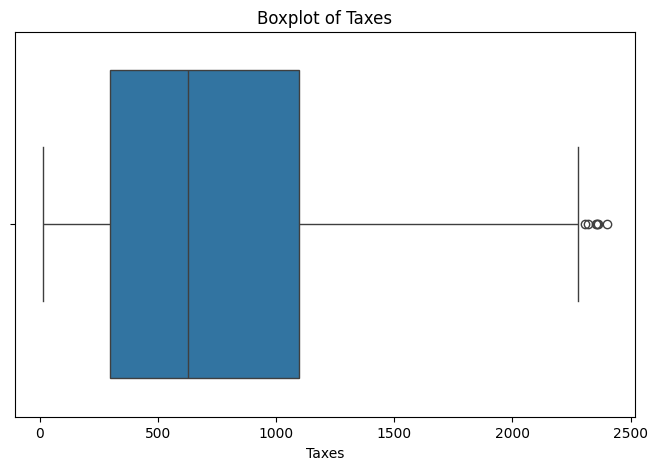

In [40]:
# 43. Boxplot of Taxes
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['tax_value'])
plt.title('Boxplot of Taxes')
plt.xlabel('Taxes')
plt.show()

In [41]:
# 44. Outlier treatment for the 'taxes' variable

# Calculating Q1 and Q3
Q1 = df['tax_value'].quantile(0.25)
Q3 = df['tax_value'].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Setting limits to identify outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtering out the outliers
df_filtered_2 = df_filtered_1[~((df_filtered_1['tax_value'] < lower_limit) | (df_filtered_1['tax_value'] > upper_limit))]

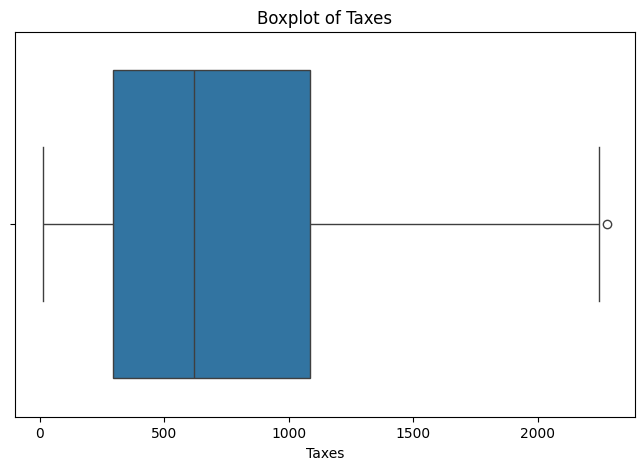

In [42]:
# 45. Boxplot of Taxes (after filtering outliers)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_filtered_2['tax_value'])
plt.title('Boxplot of Taxes')
plt.xlabel('Taxes')
plt.show()

In [43]:
# 46. Dataset info after cleaning
df_filtered_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      994 non-null    int64         
 1   transaction_date    994 non-null    datetime64[ns]
 2   payer_account       994 non-null    object        
 3   receiver_account    994 non-null    object        
 4   transaction_amount  994 non-null    float64       
 5   document_ref        994 non-null    object        
 6   transaction_type    994 non-null    object        
 7   department          994 non-null    object        
 8   tax_value           994 non-null    float64       
 9   currency_type       994 non-null    object        
 10  exchange_rate       994 non-null    float64       
 11  operation_nature    994 non-null    object        
 12  credit_account      994 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
m

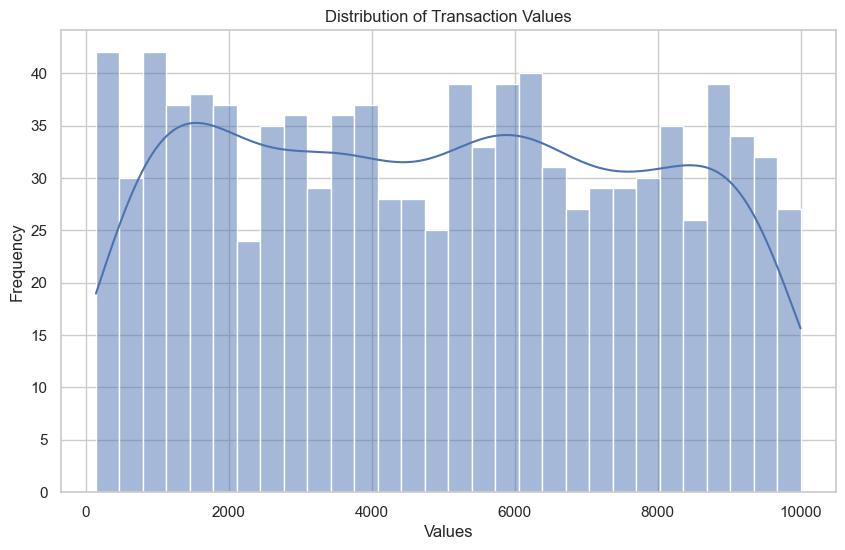

In [44]:
# 47. Setting seaborn style
sns.set(style="whitegrid")

# Creating a histogram for the 'amount' column
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered_2['transaction_amount'], kde=True, bins=30)
plt.title('Distribution of Transaction Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

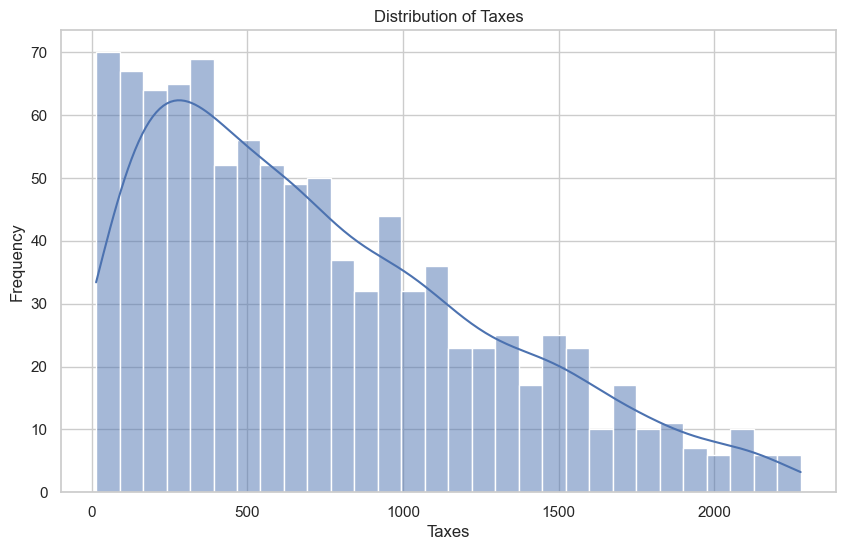

In [45]:
# 48. Setting seaborn style
sns.set(style="whitegrid")

# Creating a histogram for the 'taxes' column
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered_2['tax_value'], kde=True, bins=30)
plt.title('Distribution of Taxes')
plt.xlabel('Taxes')
plt.ylabel('Frequency')
plt.show()

In [46]:
# 49. Importing skew function from scipy.stats
from scipy.stats import skew

In [47]:
# 50. Calculating skewness
skewness = skew(df_filtered_2['transaction_amount'])
print(f"The skewness of the distribution of values is: {skewness}")

The skewness of the distribution of values is: 0.04322428704010638


In [48]:
# 51. Calculating skewness
skewness = skew(df_filtered_2['tax_value'])
print(f"The skewness of the distribution of taxes is: {skewness}")

The skewness of the distribution of taxes is: 0.750615312655735


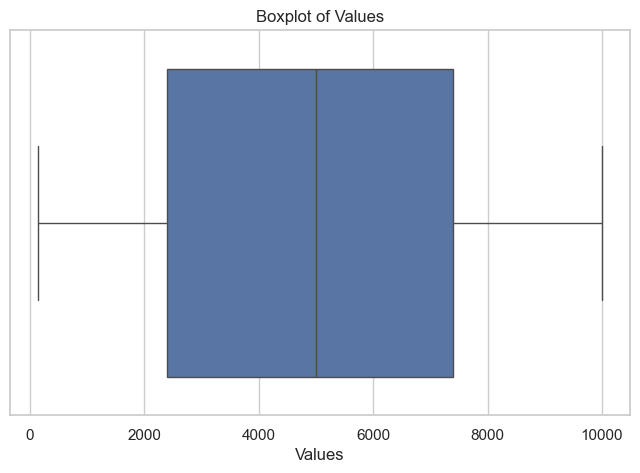

In [49]:
# 52. Boxplot of Values
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_filtered_2['transaction_amount'])
plt.title('Boxplot of Values')
plt.xlabel('Values')
plt.show()

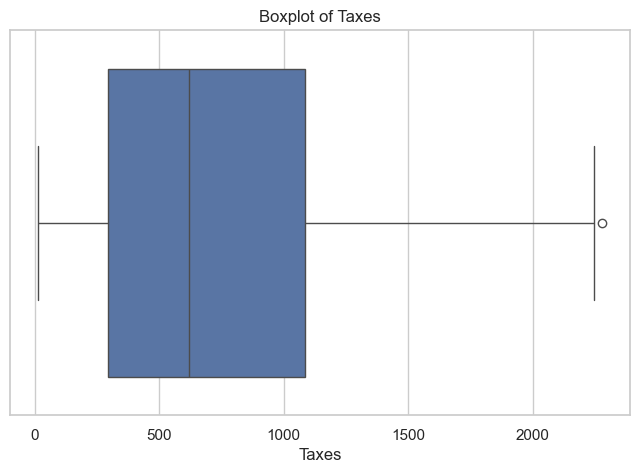

In [50]:
# 53. Boxplot of Taxes
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_filtered_2['tax_value'])
plt.title('Boxplot of Taxes')
plt.xlabel('Taxes')
plt.show()

In [51]:
# 54. Display the first few rows of the filtered dataset
df_filtered_2.head()

,transaction_id,transaction_date,payer_account,receiver_account,transaction_amount,document_ref,transaction_type,department,tax_value,currency_type,exchange_rate,operation_nature,credit_account
0,1,2023-10-17,ACC-9922,ACC-5873,3807.95,DOC-92074,Salary,Marketing,389.71,BRL,1.0006,Salary,ACC-5873
1,2,2022-04-25,ACC-4683,ACC-8430,9512.07,DOC-70238,Purchase,HR,945.46,USD,1.3618,Purchase,ACC-8430
2,3,2022-01-26,ACC-3441,ACC-2195,7346.74,DOC-12134,Refund,HR,1698.94,USD,1.4981,Refund,ACC-2195
3,4,2022-10-09,ACC-5352,ACC-1981,6026.72,DOC-26284,Purchase,Marketing,602.13,JPY,0.8210,Purchase,ACC-1981
4,5,2022-09-08,ACC-3330,ACC-3589,1644.58,DOC-30707,Purchase,Finance,171.68,BRL,1.4282,Purchase,ACC-3589


In [52]:
# 56. Converting 'release_date' to datetime
df_filtered_2['transaction_date'] = pd.to_datetime(df_filtered_2['transaction_date'])

In [53]:
# 57. Display information about the filtered dataset
df_filtered_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      994 non-null    int64         
 1   transaction_date    994 non-null    datetime64[ns]
 2   payer_account       994 non-null    object        
 3   receiver_account    994 non-null    object        
 4   transaction_amount  994 non-null    float64       
 5   document_ref        994 non-null    object        
 6   transaction_type    994 non-null    object        
 7   department          994 non-null    object        
 8   tax_value           994 non-null    float64       
 9   currency_type       994 non-null    object        
 10  exchange_rate       994 non-null    float64       
 11  operation_nature    994 non-null    object        
 12  credit_account      994 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
m

In [54]:
# 57. Creating a new column representing the number of days since the earliest date
min_date = df_filtered_2['transaction_date'].min()
df_filtered_2['days_since_release'] = (df_filtered_2['transaction_date'] - min_date).dt.days

In [55]:
# 58. Display the first few rows of the filtered dataset
df_filtered_2.head()

,transaction_id,transaction_date,payer_account,receiver_account,transaction_amount,document_ref,transaction_type,department,tax_value,currency_type,exchange_rate,operation_nature,credit_account,days_since_release
0,1,2023-10-17,ACC-9922,ACC-5873,3807.95,DOC-92074,Salary,Marketing,389.71,BRL,1.0006,Salary,ACC-5873,654
1,2,2022-04-25,ACC-4683,ACC-8430,9512.07,DOC-70238,Purchase,HR,945.46,USD,1.3618,Purchase,ACC-8430,114
2,3,2022-01-26,ACC-3441,ACC-2195,7346.74,DOC-12134,Refund,HR,1698.94,USD,1.4981,Refund,ACC-2195,25
3,4,2022-10-09,ACC-5352,ACC-1981,6026.72,DOC-26284,Purchase,Marketing,602.13,JPY,0.8210,Purchase,ACC-1981,281
4,5,2022-09-08,ACC-3330,ACC-3589,1644.58,DOC-30707,Purchase,Finance,171.68,BRL,1.4282,Purchase,ACC-3589,250


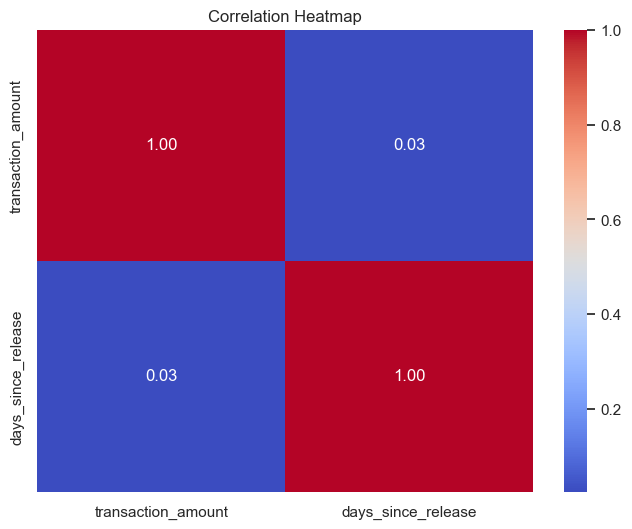

In [56]:
# 59. Calculating the correlation between 'amount' and 'days_since_release'
correlation_matrix = df_filtered_2[['transaction_amount', 'days_since_release']].corr()

# 60. Creating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

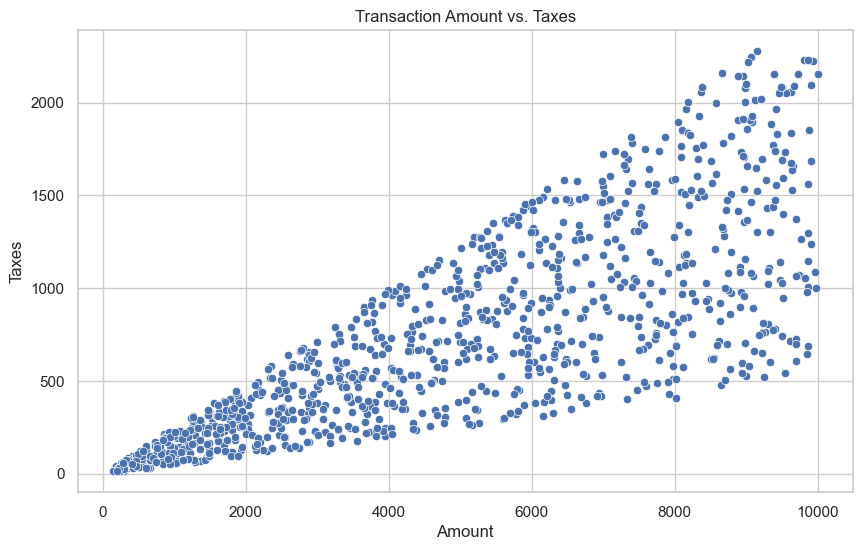

In [57]:
# 61. Creating the scatter plot between 'amount' and 'taxes'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='transaction_amount', y='tax_value', data=df_filtered_2)
plt.title('Transaction Amount vs. Taxes')
plt.xlabel('Amount')
plt.ylabel('Taxes')
plt.show()

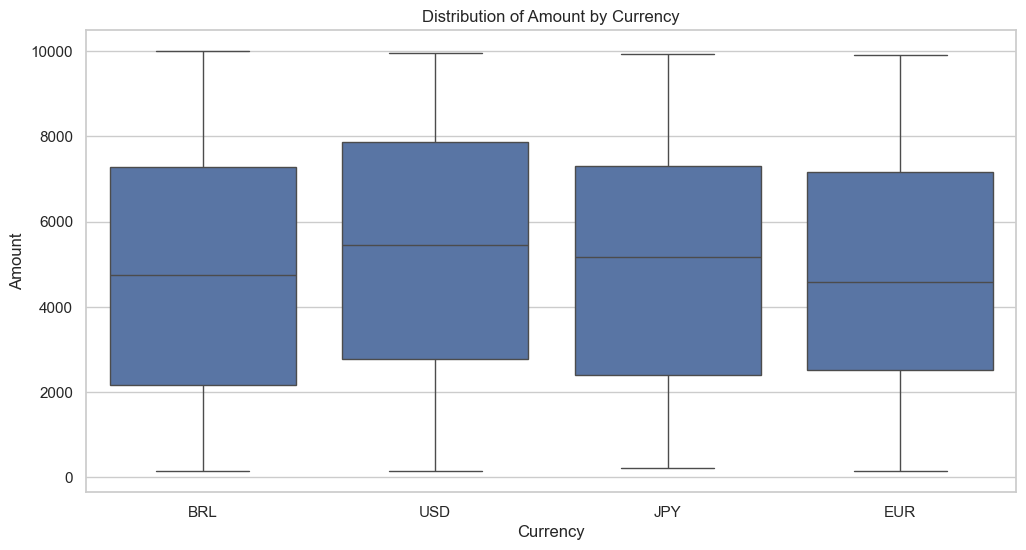

In [58]:
# 63. Creating a boxplot to analyze the association between 'amount' and 'currency'
plt.figure(figsize=(12, 6))
sns.boxplot(x='currency_type', y='transaction_amount', data=df_filtered_2)
plt.title('Distribution of Amount by Currency')
plt.xlabel('Currency')
plt.ylabel('Amount')
plt.show()